In [1]:
pip install pafy youtube-dl moviepy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   --------------------------------- ------ 1.6/1.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   --- ------------------------------------ 1.8/22.6 MB 9.1 MB/s eta 0:00:03
   ------ --------------------------------- 3.9/22.6 MB 9.8 MB/s eta 0:00:02
   ---------- ----------------------------- 5.8/22.6 MB 9.5 MB/s eta 0:00:02
   ------------- -------------------------- 7.9/22.6 MB 9.7 MB/s eta 0:00:02
   ----------------- ---------------------- 10.0/22.6 MB 9.7 MB/s eta 0:00:02
   -------------------- ------------------- 11.8/22.6 MB 9.7 MB/s eta 0:00:02
   ------------------------- -------------- 14.2/22.6 MB 9.7 MB/s eta 0:00:01
   ---------------------------- ----------- 16.3/22.6 MB 9.7 MB/s


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip


In [3]:
pip install yt-dlp


   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------- ----------------------- 1.3/3.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  3.1/3.2 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip


In [11]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import pandas as pd


In [9]:
import pandas as pd

df = pd.read_excel(r'E:\kallege\19CSE437 - dlcv\course proj\dtset\Linkcsv.xlsx')
urls = df['URL']
timestamps = df['Behaviour Time Instant (mm:ss) (StartTime - EndTime )']
df

,No,Type,Video,URL,Video Duration (s),Behaviour Time Instant (mm:ss) (StartTime - EndTime )
0,1,armflapping,v_ArmFlapping_01,http://www.youtube.com/watch?v=I7fdv1q9-m8,45,00:18 - 00:24
1,2,armflapping,v_ArmFlapping_02,http://www.youtube.com/watch?v=hKf-IwHM6TI,51,00:10 - 00:20
2,3,armflapping,v_ArmFlapping_03,http://www.youtube.com/watch?v=Z2kfvB4lv7A,61,00:20 - 00:25
3,4,armflapping,v_ArmFlapping_04,http://www.youtube.com/watch?v=SOc13pnf-Dc,199,01:00 - 01:10
4,5,armflapping,v_ArmFlapping_05,http://www.youtube.com/watch?v=8vFUIFEfRpA,215,00:02 - 00:14
...,...,...,...,...,...,...
70,71,spinning,v_Spinning_21,http://www.youtube.com/watch?v=kFuxwAufWvQ,127,00:02 - 00:20
71,72,spinning,v_Spinning_22,http://www.youtube.com/watch?v=8R1MfXoI3mo,80,00:02 - 00:07
72,73,spinning,v_Spinning_23,http://www.youtube.com/watch?v=yiEo7Kg1ngY,157,00:01 - 00:25
73,74,spinning,v_Spinning_24,http://www.youtube.com/watch?v=-rC-ab0nzxY,47,00:26 - 00:43


In [21]:
import yt_dlp

def download_video(url, output_path='downloads'):
    ydl_opts = {
        'outtmpl': f'{output_path}/%(title)s.%(ext)s',
        'format': 'best',
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

# Example usage
for url in urls:
    download_video(url)


[youtube] Extracting URL: http://www.youtube.com/watch?v=I7fdv1q9-m8
[youtube] I7fdv1q9-m8: Downloading webpage
[youtube] I7fdv1q9-m8: Downloading ios player API JSON
[youtube] I7fdv1q9-m8: Downloading web creator player API JSON
[youtube] I7fdv1q9-m8: Downloading player 43bc9526
[youtube] I7fdv1q9-m8: Downloading m3u8 information
[info] I7fdv1q9-m8: Downloading 1 format(s): 18
[download] Destination: downloads\10 yr severe autistic.mp4
[download] 100% of    2.55MiB in 00:00:01 at 1.55MiB/s   
[youtube] Extracting URL: http://www.youtube.com/watch?v=hKf-IwHM6TI
[youtube] hKf-IwHM6TI: Downloading webpage
[youtube] hKf-IwHM6TI: Downloading ios player API JSON
[youtube] hKf-IwHM6TI: Downloading web creator player API JSON
[youtube] hKf-IwHM6TI: Downloading m3u8 information
[info] hKf-IwHM6TI: Downloading 1 format(s): 18
[download] Destination: downloads\Arm flapping.mp4
[download] 100% of    1.97MiB in 00:00:01 at 1.12MiB/s   
[youtube] Extracting URL: http://www.youtube.com/watch?v=Z2kfv

ERROR: [youtube] ehlLfMossUY: Private video. Sign in if you've been granted access to this video


DownloadError: ERROR: [youtube] ehlLfMossUY: Private video. Sign in if you've been granted access to this video

In [13]:
df = pd.read_excel(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\dtset\Linkcsv.xlsx')
df

,No,Type,Video,URL,Video Duration (s),Behaviour Time Instant (mm:ss) (StartTime - EndTime )
0,1,armflapping,v_ArmFlapping_01,http://www.youtube.com/watch?v=I7fdv1q9-m8,45,00:18 - 00:24
1,2,armflapping,v_ArmFlapping_02,http://www.youtube.com/watch?v=hKf-IwHM6TI,51,00:10 - 00:20
2,3,armflapping,v_ArmFlapping_03,http://www.youtube.com/watch?v=Z2kfvB4lv7A,61,00:20 - 00:25
3,4,armflapping,v_ArmFlapping_04,http://www.youtube.com/watch?v=SOc13pnf-Dc,199,01:00 - 01:10
4,5,armflapping,v_ArmFlapping_05,http://www.youtube.com/watch?v=8vFUIFEfRpA,215,00:02 - 00:14
5,6,armflapping,v_ArmFlapping_06,http://www.youtube.com/watch?v=5Ps9iE8mPqY,254,00:18 - 00:22
6,7,armflapping,v_ArmFlapping_07,http://www.youtube.com/watch?v=C_O8vyrSt0Q,168,00:05 - 00:15
7,8,armflapping,v_ArmFlapping_08,http://www.youtube.com/watch?v=iDuAugAykcc,134,01:08 - 01:25
8,9,armflapping,v_ArmFlapping_09,http://www.youtube.com/watch?v=mnBWOI4LuKw,166,02:11 - 02:35
9,10,armflapping,v_ArmFlapping_10,http://www.youtube.com/watch?v=3Oh_Lmehb6c,86,00:40 - 00:50


In [39]:
import yt_dlp
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import pandas as pd
import os
import re

# Function to download video using yt-dlp
def download_video(url, output_path='downloads', filename='video.mp4'):
    ydl_opts = {
        'outtmpl': f'{output_path}/{filename}',
        'format': 'best',
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

# Function to sanitize filenames
def sanitize_filename(filename):
    return re.sub(r'[<>:"/\\|?*\x00-\x1F]', '_', filename)

# Function to extract specific timestamp from the video
def extract_segment(video_path, start_time, end_time, output_path):
    print(f'Extracting from {start_time} to {end_time} into {output_path}')
    try:
        ffmpeg_extract_subclip(video_path, start_time, end_time, targetname=output_path)
    except Exception as e:
        print(f'Error extracting segment: {e}')

# Load the Excel file
df = pd.read_excel(r'E:\kallege\19CSE437 - dlcv\course proj\dtset\Linkcsv.xlsx')
urls = df['URL']
timestamps = df['Behaviour Time Instant (mm:ss) (StartTime - EndTime )']
i=1

# Create directories if they don't exist
if not os.path.exists('downloads'):
    os.makedirs('downloads')
if not os.path.exists('clips'):
    os.makedirs('clips')

# Process each URL and timestamp
for url, timestamp in zip(urls, timestamps):
    start_time_str, end_time_str = timestamp.split(' - ')
    
    # Convert timestamp to seconds
    start_minutes, start_seconds = map(int, start_time_str.split(':'))
    end_minutes, end_seconds = map(int, end_time_str.split(':'))
    
    start_time_seconds = start_minutes * 60 + start_seconds
    end_time_seconds = end_minutes * 60 + end_seconds

    print(f'Start: {start_time_seconds}s, End: {end_time_seconds}s')

    # Define filename
    filename = f'{i}.mp4'

    # Download the video
    download_video(url, filename=filename)

    # Define video path and output path for the extracted segment
    video_path = f'downloads/{filename}'
    
    # Sanitize timestamps for the output path
    start_time_str = sanitize_filename(start_time_str)
    end_time_str = sanitize_filename(end_time_str)
    output_path = f'clips/{i}_{start_time_str}_{end_time_str}.mp4'
    
    # Extract the specific segment
    extract_segment(video_path, start_time_seconds, end_time_seconds, output_path)
    i += 1

print("Processing complete.")

Start: 18s, End: 24s
[youtube] Extracting URL: http://www.youtube.com/watch?v=I7fdv1q9-m8
[youtube] I7fdv1q9-m8: Downloading webpage
[youtube] I7fdv1q9-m8: Downloading ios player API JSON
[youtube] I7fdv1q9-m8: Downloading web creator player API JSON
[youtube] I7fdv1q9-m8: Downloading m3u8 information
[info] I7fdv1q9-m8: Downloading 1 format(s): 18
[download] downloads\1.mp4 has already been downloaded
[download] 100% of    2.55MiB
Extracting from 18 to 24 into clips/1_00_18_00_24.mp4
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Start: 10s, End: 20s
[youtube] Extracting URL: http://www.youtube.com/watch?v=hKf-IwHM6TI
[youtube] hKf-IwHM6TI: Downloading webpage
[youtube] hKf-IwHM6TI: Downloading ios player API JSON
[youtube] hKf-IwHM6TI: Downloading web creator player API JSON
[youtube] hKf-IwHM6TI: Downloading m3u8 information
[info] hKf-IwHM6TI: Downloading 1 format(s): 18
[download] downloads\2.mp4 has already been downloaded
[download] 100% of    1.97MiB
Extra

In [25]:
import os
import shutil

# Define the folder paths
source_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\clips'
destination_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Get a list of the video files in the source folder
video_files = os.listdir(source_folder)

# Process each file according to the specified renaming rules
for filename in video_files:
    # Extract the video number from the filename (before the first underscore)
    try:
        video_number = int(filename.split('_')[0])
        
    except ValueError:
        print(f"Skipping '{filename}': does not match the expected format.")
        continue

    # Determine the value of x based on the video number
    if 1 <= video_number <= 20:
        x = 0
    elif 21 <= video_number <= 39:
        x = 1
    elif 40 <= video_number <= 58:
        x = 2
    else:
        print(f"Skipping '{filename}': video number out of range.")
        continue

    # Define the new filename
    new_filename = f"{video_number}_{x}.mp4"
    
    # Define the source and destination paths
    old_path = os.path.join(source_folder, filename)
    new_path = os.path.join(destination_folder, new_filename)
    
    # Copy the file to the destination folder with the new name
    shutil.copy(old_path, new_path)
    print(f"Copied '{filename}' to '{new_filename}' in '{destination_folder}'")


10
Copied '10_00_40_00_50.mp4' to '10_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
11
Copied '11_00_03_00_07.mp4' to '11_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
12
Copied '12_00_17_00_23.mp4' to '12_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
13
Copied '13_00_32_00_46.mp4' to '13_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
14
Copied '14_00_03_00_08.mp4' to '14_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
15
Copied '15_02_55_03_10.mp4' to '15_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
16
Copied '16_01_34_01_38.mp4' to '16_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
17
Copied '17_00_12_00_16.mp4' to '17_0.mp4' in 'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
18
Copied '18_00_02_00_06.mp4' to '18_0.mp4' in 'D:\2 old lptop\kallege\19CSE437

In [29]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define folders
source_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset'
train_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train'
val_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\val'
test_folder = r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\test'


# Define ranges for each category
category_0 = [f"{i}_0.mp4" for i in range(1, 21)]
category_1 = [f"{i}_1.mp4" for i in range(21, 40)]
category_2 = [f"{i}_2.mp4" for i in range(40, 59)]

# Function to split a category
def split_category(videos):
    train, temp = train_test_split(videos, test_size=0.3, random_state=42)  # 70% train, 30% temp
    val, test = train_test_split(temp, test_size=0.5, random_state=42)      # 15% val, 15% test
    return train, val, test

# Split each category
train_0, val_0, test_0 = split_category(category_0)
train_1, val_1, test_1 = split_category(category_1)
train_2, val_2, test_2 = split_category(category_2)

# Combine splits for each set
train_set = train_0 + train_1 + train_2
val_set = val_0 + val_1 + val_2
test_set = test_0 + test_1 + test_2

# Copy files to respective folders
def copy_files(file_list, destination_folder):
    for file_name in file_list:
        src = os.path.join(source_folder, file_name)
        dst = os.path.join(destination_folder, file_name)
        shutil.copy(src, dst)
        print(f"Copied {file_name} to {destination_folder}")

copy_files(train_set, train_folder)
copy_files(val_set, val_folder)
copy_files(test_set, test_folder)


Copied 12_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 4_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 19_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 17_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 14_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 3_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 10_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 20_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 5_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 13_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 8_0.mp4 to D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train
Copied 11_0.mp

In [35]:
import cv2
import numpy as np
import os

# Parameters
frame_count = 20  # Number of frames per video
frame_size = (64, 64)  # Resize each frame to 64x64
video_folder = 'train'  # Set to 'train', 'val', or 'test'

# Function to load video frames
def load_video_frames(video_path, frame_count, frame_size):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0
    while count < frame_count:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)  # Resize frame
        frames.append(frame)
        count += 11
    cap.release()
    
    # Pad with empty frames if fewer than frame_count
    while len(frames) < frame_count:
        frames.append(np.zeros((frame_size[0], frame_size[1], 3)))
    return np.array(frames)

# Example to process all videos in a folder
def process_videos(video_folder, frame_count, frame_size):
    video_data = []
    labels = []
    
    for filename in os.listdir(video_folder):
        if filename.endswith(".mp4"):
            # Load frames
            video_path = os.path.join(video_folder, filename)
            frames = load_video_frames(video_path, frame_count, frame_size)
            video_data.append(frames)
            
            # Extract label from filename
            label = int(filename.split('_')[1].split('.')[0])
            labels.append(label)
    
    return np.array(video_data), np.array(labels)

# Load train, val, test sets
X_train, y_train = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train', frame_count, frame_size)
X_val, y_val = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\val', frame_count, frame_size)
X_test, y_test = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\test', frame_count, frame_size)


In [37]:
X_train

array([[[[[ 48.,  60.,  70.],
          [ 42.,  54.,  64.],
          [ 47.,  59.,  69.],
          ...,
          [ 28.,  12.,  17.],
          [ 39.,  30.,  34.],
          [ 47.,  44.,  45.]],

         [[ 44.,  56.,  67.],
          [ 39.,  51.,  60.],
          [ 37.,  48.,  57.],
          ...,
          [ 24.,   8.,  13.],
          [ 39.,  30.,  34.],
          [ 47.,  44.,  45.]],

         [[ 32.,  40.,  51.],
          [ 23.,  32.,  42.],
          [ 20.,  28.,  39.],
          ...,
          [ 22.,  10.,  12.],
          [ 40.,  31.,  35.],
          [ 47.,  44.,  45.]],

         ...,

         [[ 24.,  42.,  89.],
          [ 24.,  40.,  92.],
          [ 22.,  40.,  90.],
          ...,
          [238., 195., 162.],
          [252., 221., 187.],
          [255., 240., 187.]],

         [[ 34.,  48.,  96.],
          [ 34.,  48.,  96.],
          [ 32.,  46.,  94.],
          ...,
          [116.,  95., 108.],
          [138., 114., 123.],
          [157., 134., 136.]],



In [39]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0])

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
def create_cnn_lstm_model(frame_count, frame_size):
    model = Sequential()
    
    # TimeDistributed CNN layers
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(frame_count, frame_size[0], frame_size[1], 3)))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))

    # LSTM layer
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))

    # Dense output layer
    model.add(Dense(3, activation='softmax'))  # 3 categories (arm-flapping, head-banging, spinning)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = create_cnn_lstm_model(frame_count, frame_size)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=8)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3917 - loss: 1.0999 - val_accuracy: 0.3333 - val_loss: 1.1002
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - accuracy: 0.2490 - loss: 1.1060 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 586ms/step - accuracy: 0.2441 - loss: 1.1027 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - accuracy: 0.1955 - loss: 1.1041 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - accuracy: 0.2688 - loss: 1.1019 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step - accuracy: 0.3840 - loss: 1.0971 - val_accuracy: 0.3333 - val_loss: 1.0997
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 586ms/step - accuracy: 0.4236 - loss: 1.0951 - val_accuracy: 0.3333 - val_loss: 1.0997
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step - accuracy: 0.4316 - loss: 1.0976 - val_accuracy: 0.3333 - val_loss: 1

In [43]:
# Evaluate the model on the test set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3479 - loss: 1.0977 
Train Accuracy: 0.35


In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3333 - loss: 1.0989
Test Accuracy: 0.33


In [47]:
# Evaluate the model on the test set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Val Accuracy: {val_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3333 - loss: 1.0989
Val Accuracy: 0.33


In [49]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load ResNet50 for feature extraction (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(frame_size[0], frame_size[1], 3))

# Define model with ResNet50 as feature extractor
def create_cnn_lstm_with_pretrained(frame_count, frame_size):
    model = Sequential()
    
    # TimeDistributed ResNet50 model for feature extraction
    model.add(TimeDistributed(base_model, input_shape=(frame_count, frame_size[0], frame_size[1], 3)))
    model.add(TimeDistributed(GlobalAveragePooling2D()))

    # LSTM layer
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))

    # Dense output layer
    model.add(Dense(3, activation='softmax'))  # 3 categories

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and train the model
model = create_cnn_lstm_with_pretrained(frame_count, frame_size)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=4)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 450s 10s/step - accuracy: 0.3826 - loss: 1.1430 - val_accuracy: 0.3333 - val_loss: 1.3023
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.3068 - loss: 1.3761 - val_accuracy: 0.3333 - val_loss: 1.1359
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.3280 - loss: 1.2898 - val_accuracy: 0.3333 - val_loss: 1.1488
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.3130 - loss: 1.1810 - val_accuracy: 0.3333 - val_loss: 1.1921
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.2832 - loss: 1.1974 - val_accuracy: 0.3333 - val_loss: 1.2622
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.2372 - loss: 1.2203 - val_accuracy: 0.3333 - val_loss: 1.2040
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.3413 - loss: 1.0789 - val_accuracy: 0.3333 - val_loss: 1.2094
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.

In [55]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Val Accuracy: {val_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3479 - loss: 1.1708
Train Accuracy: 0.35
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.1659
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.1694
Val Accuracy: 0.33


In [57]:
# Assuming 'history' contains the training history returned by model.fit()
train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

print(f"Final Training Accuracy: {train_accuracy:.2f}")
print(f"Final Validation Accuracy: {val_accuracy:.2f}")


Final Training Accuracy: 0.30
Final Validation Accuracy: 0.33


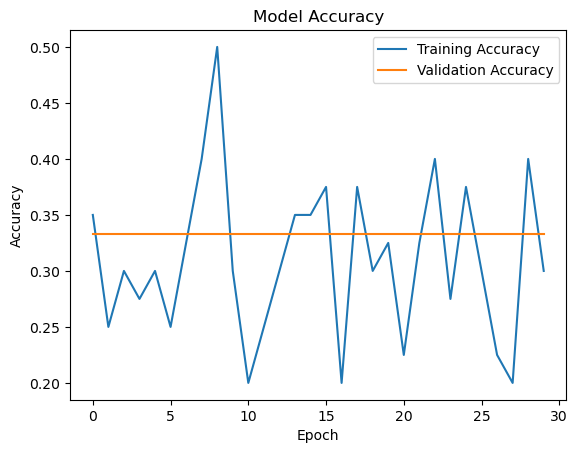

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
# Save the entire model after training
model.save('cnn_lstm_action_recognition_model.h5')


In [61]:
model

<Sequential name=sequential_1, built=True>

In [63]:
from tensorflow.keras.regularizers import l2

def create_cnn_lstm_model_v2(frame_count, frame_size):
    model = Sequential()
    
    # TimeDistributed CNN layers with more filters and additional layers
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)), 
                              input_shape=(frame_count, frame_size[0], frame_size[1], 3)))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001))))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001))))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))

    # LSTM layer with increased units
    model.add(LSTM(128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))

    # Additional dense layers
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and train the new model
model_v2 = create_cnn_lstm_model_v2(frame_count, frame_size)
history_v2 = model_v2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=8)


  super().__init__(**kwargs)



Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3958 - loss: 1.5207 - val_accuracy: 0.3333 - val_loss: 1.5183
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4729 - loss: 1.5006 - val_accuracy: 0.3333 - val_loss: 1.5038
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2368 - loss: 1.5179 - val_accuracy: 0.3333 - val_loss: 1.4886
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2594 - loss: 1.4694 - val_accuracy: 0.3333 - val_loss: 1.4738
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3941 - loss: 1.4483 - val_accuracy: 0.3333 - val_loss: 1.4599
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2462 - loss: 1.5054 - val_accuracy: 0.3333 - val_loss: 1.4468
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3302 - loss: 1.4699 - val_accuracy: 0.3333 - val_loss: 1.4347
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3941 - loss: 1.4317 - val_accuracy: 0.3333 - val_loss: 1.4237
Epoch 9/30
5/5 

In [67]:
# Assuming 'history' contains the training history returned by model.fit()
train_accuracy = history_v2.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = history_v2.history['val_accuracy'][-1]  # Last epoch's validation accuracy

print(f"Final Training Accuracy: {train_accuracy:.2f}")
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Final Training Accuracy: 0.32
Final Validation Accuracy: 0.33


In [69]:
# Save the entire model after training
model.save('cnn_lstm_action_recognition_model_v2.h5')


In [ ]:
# Load train, val, test sets
X_train, y_train = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train', frame_count, frame_size)
X_val, y_val = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\val', frame_count, frame_size)
X_test, y_test = process_videos(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\test', frame_count, frame_size)


In [73]:
import cv2
import numpy as np
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model for feature extraction
vgg_model = VGG16(weights='imagenet', include_top=False)
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-1].output)

# Function to extract features from video frames
def extract_features_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))
        frame = preprocess_input(frame)  # Preprocessing for VGG16
        frames.append(frame)
    cap.release()
    
    # Convert frames to numpy array and extract features
    frames = np.array(frames)
    features = feature_extractor.predict(frames)
    return np.mean(features, axis=0)  # Average features across frames


In [75]:
import pandas as pd

def process_videos_to_csv(folder_path, output_csv):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".mp4"):  # Adjust if using different video extensions
            video_id, label = filename.split("_")
            label = int(label.split(".")[0])  # Extract label from filename
            
            # Extract features
            video_path = os.path.join(folder_path, filename)
            features = extract_features_from_video(video_path)
            features = features.flatten()  # Flatten to 1D array
            
            # Append features and label to data list
            data.append(np.append(features, label))
    
    # Convert to DataFrame and save to CSV
    columns = [f'feature_{i}' for i in range(features.size)] + ['label']
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(output_csv, index=False)

# Process each folder and save CSVs
process_videos_to_csv(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\train', 'train_features.csv')
process_videos_to_csv(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\val', 'val_features.csv')
process_videos_to_csv(r'D:\2 old lptop\kallege\19CSE437 - dlcv\course proj\final_dataset\test', 'test_features.csv')


10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step
8/8 ━━━━━━━━━━━━━━━

In [83]:
data

array([[ 0.        ,  0.        ,  0.        , ...,  1.93387759,
         0.31243047,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 13.34912777,
         5.22143269,  0.        ],
       [ 3.30769229,  0.35307273,  0.        , ..., 22.52532196,
         0.        ,  1.        ],
       ...,
       [ 0.03549158,  0.        ,  0.52716237, ...,  0.95814353,
         0.7503379 ,  2.        ],
       [ 1.35354066,  0.59671563,  0.        , ..., 24.72911072,
         0.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.53909111,
        17.93577003,  0.        ]])

In [77]:
def augment_data_with_noise(data, noise_level=0.1, augment_count=5):
    augmented_data = []
    for row in data:
        features, label = row[:-1], row[-1]
        for _ in range(augment_count):
            noisy_features = features + np.random.normal(0, noise_level, features.shape)
            augmented_data.append(np.append(noisy_features, label))
    return np.array(augmented_data)

# Load, augment, and save to new CSVs
for split in ['train', 'val', 'test']:
    data = pd.read_csv(f"{split}_features.csv").values
    augmented_data = augment_data_with_noise(data, noise_level=0.1, augment_count=5)
    pd.DataFrame(augmented_data).to_csv(f"{split}_features_augmented.csv", index=False)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load CSV data
train_data = pd.read_csv("train_features_augmented.csv").values
val_data = pd.read_csv("val_features_augmented.csv").values
test_data = pd.read_csv("test_features_augmented.csv").values

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Define the model
mod = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile and train the model
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mod.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=8)

# Evaluate on test set
test_loss, test_accuracy = mod.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2991 - loss: 32.3651 - val_accuracy: 0.3333 - val_loss: 13.0642
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5183 - loss: 19.9224 - val_accuracy: 0.4444 - val_loss: 5.8698
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5835 - loss: 20.7516 - val_accuracy: 0.4444 - val_loss: 8.8571
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6714 - loss: 16.2486 - val_accuracy: 0.4444 - val_loss: 9.6471
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7896 - loss: 6.0935 - val_accuracy: 0.5556 - val_loss: 5.4001
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7028 - loss: 15.2282 - val_accuracy: 0.5556 - val_loss: 2.7703
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7996 - loss: 7.3517 - val_accuracy: 0.3333 - val_loss: 11.0665
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7748 - loss: 6.2443 - val_accuracy: 0.5

In [168]:
mod.save('final_model.h5')

In [93]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = mod.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate Sensitivity and Specificity
TN = conf_matrix[0][0]  # True Negative
TP = conf_matrix[1][1]  # True Positive
FP = conf_matrix[0][1]  # False Positive
FN = conf_matrix[1][0]  # False Negative

sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

# Print the results
print("S.No | Measure/Metric | Value | Unit | Purpose")
print(f"1    | Accuracy       | {accuracy:.4f} | -    | Overall accuracy of the model")
print(f"2    | Precision      | {precision:.4f} | -    | Proportion of true positive results in all positive predictions")
print(f"3    | Recall         | {recall:.4f} | -    | Proportion of true positive results in all actual positives")
print(f"4    | Sensitivity    | {sensitivity:.4f} | -    | True positive rate; sensitivity to detect positives")
print(f"5    | Specificity    | {specificity:.4f} | -    | True negative rate; ability to detect negatives")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
S.No | Measure/Metric | Value | Unit | Purpose
1    | Accuracy       | 0.5556 | -    | Overall accuracy of the model
2    | Precision      | 0.4667 | -    | Proportion of true positive results in all positive predictions
3    | Recall         | 0.5556 | -    | Proportion of true positive results in all actual positives
4    | Sensitivity    | 0.0000 | -    | True positive rate; sensitivity to detect positives
5    | Specificity    | 0.6667 | -    | True negative rate; ability to detect negatives


In [95]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load CSV data
train_data = pd.read_csv("train_features_augmented.csv").values
val_data = pd.read_csv("val_features_augmented.csv").values
test_data = pd.read_csv("test_features_augmented.csv").values

# Split the data into features and labels
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Function to calculate metrics
def calculate_metrics(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y, y_pred_classes)

    # Calculate Sensitivity and Specificity
    TN = conf_matrix[0][0]  # True Negative
    TP = conf_matrix[1][1]  # True Positive
    FP = conf_matrix[0][1]  # False Positive
    FN = conf_matrix[1][0]  # False Negative

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy, precision, recall, sensitivity, specificity

# Calculate metrics for train, validation, and test sets
train_metrics = calculate_metrics(mod, X_train, y_train)
val_metrics = calculate_metrics(mod, X_val, y_val)
test_metrics = calculate_metrics(mod, X_test, y_test)

# Print the results
def print_metrics(metrics, dataset_name):
    print(f"\n{dataset_name} Metrics:")
    print("S.No | Measure/Metric | Value | Unit | Purpose")
    print(f"1    | Accuracy       | {metrics[0]:.4f} | -    | Overall accuracy of the model")
    print(f"2    | Precision      | {metrics[1]:.4f} | -    | Proportion of true positive results in all positive predictions")
    print(f"3    | Recall         | {metrics[2]:.4f} | -    | Proportion of true positive results in all actual positives")
    print(f"4    | Sensitivity    | {metrics[3]:.4f} | -    | True positive rate; sensitivity to detect positives")
    print(f"5    | Specificity    | {metrics[4]:.4f} | -    | True negative rate; ability to detect negatives")

print_metrics(train_metrics, "Train")
print_metrics(val_metrics, "Validation")
print_metrics(test_metrics, "Test")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Train Metrics:
S.No | Measure/Metric | Value | Unit | Purpose
1    | Accuracy       | 1.0000 | -    | Overall accuracy of the model
2    | Precision      | 1.0000 | -    | Proportion of true positive results in all positive predictions
3    | Recall         | 1.0000 | -    | Proportion of true positive results in all actual positives
4    | Sensitivity    | 1.0000 | -    | True positive rate; sensitivity to detect positives
5    | Specificity    | 1.0000 | -    | True negative rate; ability to detect negatives

Validation Metrics:
S.No | Measure/Metric | Value | Unit | Purpose
1    | Accuracy       | 0.6667 | -    | Overall accuracy of the model
2    | Precision      | 0.7000 | -    | Proportion of true positive results in all positive predictions
3    | Recall         | 0.6667 | -    | Proportion of true positive results in all actual positives
4    | Sensitivity    | 1.0

In [99]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Assuming you have a model defined and your data loaded
# Example data
train_data = pd.read_csv("train_features_augmented.csv").values
val_data = pd.read_csv("val_features_augmented.csv").values

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]

# Store the metrics
epochs = []
training_accuracy = []
training_loss = []
validation_accuracy = []
validation_loss = []
auc_values = []

# Define the model
mod = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Ensure this matches the number of classes
])

# Compile the model
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with a custom callback to log metrics
for epoch in range(1, 101, 10):
    history = mod.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8, verbose=0)

    # Get training and validation metrics
    train_accuracy = history.history['accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    # Compute AUC for validation set using predicted probabilities
    y_val_pred = mod.predict(X_val)
    auc = roc_auc_score(y_val, y_val_pred, multi_class='ovr')

    # Store the metrics
    epochs.append(epoch)
    training_accuracy.append(train_accuracy)
    training_loss.append(train_loss)
    validation_accuracy.append(val_accuracy)
    validation_loss.append(val_loss)
    auc_values.append(auc)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "S.No": range(1, len(epochs) + 1),
    "Epochs": [f"{e}-{e + 9}" for e in epochs],
    "Training Accuracy": training_accuracy,
    "Training Loss": training_loss,
    "Validation Accuracy": validation_accuracy,
    "Validation Loss": validation_loss,
    "AUC": auc_values
})

print(results_df)


  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/stepWARNING:tensorflow:5 out of the last 18 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000158B627C9A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
   S.No  Epochs  Training Accuracy  Training Loss  Validation Accuracy  \
0     1    1-10              0.760       1.546087             0.222222   
1     2   11-20              0.780       0.905763             0.666667   
2     3   21-30              0.770       1.823141             0.444444   
3     4   31-40              0.775       0.422024             0.666667   
4     5   41-50              0.815       0.359248             0.666667   
5     6   51-60              0.755       0.440412             0.666667   
6     7   61-70              0.825       0.330943             0.666667   
7     8   71-80             

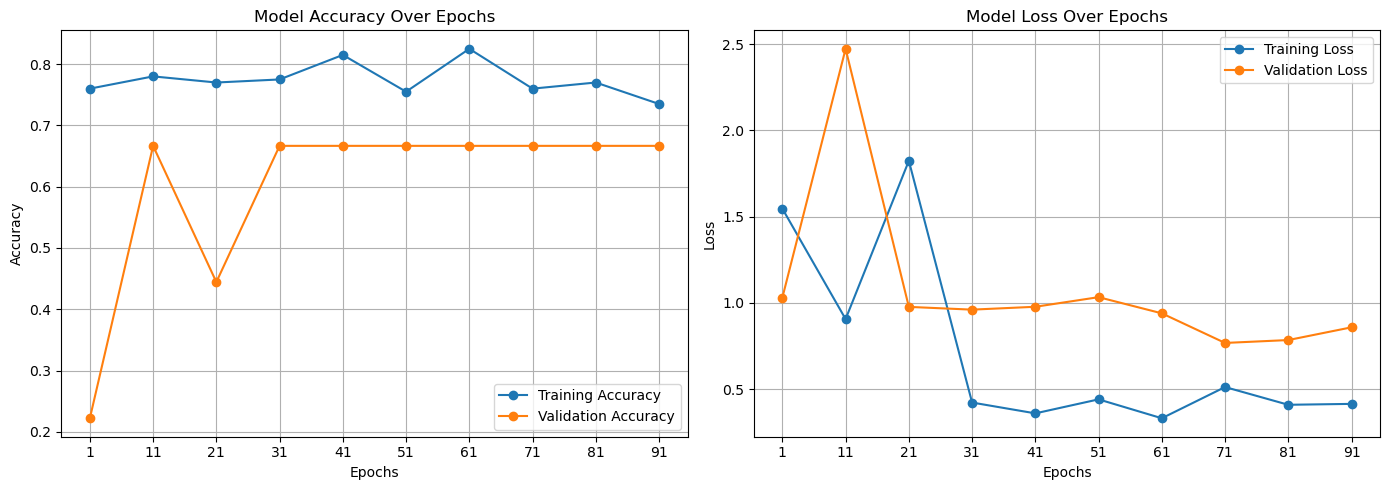

In [101]:
import matplotlib.pyplot as plt

# Assuming you have stored your metrics in the lists: 
# training_accuracy, training_loss, validation_accuracy, validation_loss

# Create a new figure
plt.figure(figsize=(14, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # To display the epochs on x-axis
plt.legend()
plt.grid()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # To display the epochs on x-axis
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test contains the true labels and y_pred_classes contains the predicted labels
y_pred = mod.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Calculate metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision: 0.8333
Recall: 0.6667
F1 Score: 0.6556


In [135]:
mod.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,659,531 (36.85 MB)

 Trainable params: 3,219,843 (12.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,439,688 (24.57 MB)

In [141]:
max_features = 20000
maxlen = 100
embedding_size = 128
# Convolution
kernel_size = 5
filters = 64
pool_size = 4
# LSTM
lstm_output_size = 70
# Training
batch_size = 32
epochs = 100

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

  warnings.warn(



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [146]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, BatchNormalization, TimeDistributed

# Define the model
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Flatten and reshape for LSTM input
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Reshape to 3D for LSTM (batch_size, time_steps, features)
    model.add(tf.keras.layers.Reshape((-1, 256)))  # Adjust this based on your sequence length

    # LSTM layer
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (64, 64, 1)  # Example shape, adjust based on your data
num_classes = 3  # Headbanging, Arm flapping, Spinning

# Create the model
model = create_cnn_lstm_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          61,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,355,225 (5.17 MB)

 Trainable params: 1,354,777 (5.17 MB)

 Non-trainable params: 448 (1.75 KB)

In [164]:
mod.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,659,531 (36.85 MB)

 Trainable params: 3,219,843 (12.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,439,688 (24.57 MB)

In [170]:
from tensorflow.keras.models import load_model

model = load_model('final_model.h5')


In [172]:
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,219,845 (12.28 MB)

 Trainable params: 3,219,843 (12.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [211]:
explainer = shap.DeepExplainer(mod, X_train[:10])  # DeepExplainer for neural networks
shap_values = explainer.shap_values(X_test[:5])

  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")



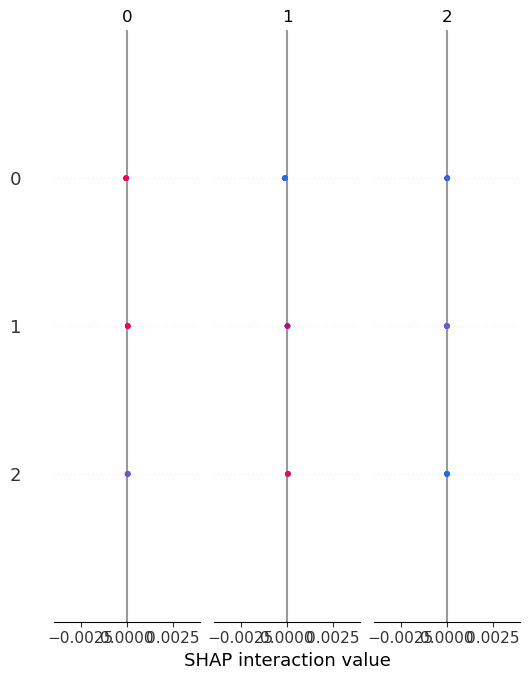

In [213]:
shap.summary_plot(shap_values, X_test[:5], feature_names=data.columns[:-1])


In [206]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train, mode="classification", training_labels=y_train, feature_names=data.columns[:-1])

# Choose a sample to explain
i = 0  # Index of the sample in X_test
explanation = explainer.explain_instance(X_test[i], mod.predict, num_features=10)

# Display explanation
explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [225]:
import shap
import numpy as np
explainer = shap.DeepExplainer(model, X_train[:100])  # Use a subset to save computation time
shap_values = explainer.shap_values(X_test[:10])


  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")



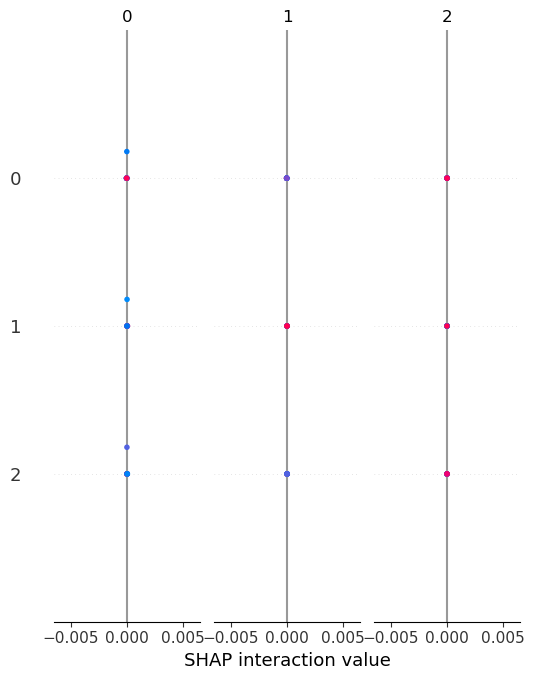

In [227]:
shap.summary_plot(shap_values, X_test[:10], feature_names=data.columns[:-1])


In [235]:
print("X_test[0] shape:", X_test[0].shape)
print("SHAP values shape:", shap_values[0][0].shape)


X_test[0] shape: (25088,)
SHAP values shape: (3,)
